<a href="https://colab.research.google.com/github/benjaminsw/Generalised_Linear_Models/blob/main/R_galapagos_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
if (!require('faraway')) install.packages('faraway'); library('faraway')

Loading required package: faraway

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘faraway’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘lme4’




In [2]:
gal1 <- glm(Species ~ Area + Elevation +Nearest +Scruz +Adjacent, family=poisson, data=gala)
summary(gal1)


Call:
glm(formula = Species ~ Area + Elevation + Nearest + Scruz + 
    Adjacent, family = poisson, data = gala)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.2752  -4.4966  -0.9443   1.9168  10.1849  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.155e+00  5.175e-02  60.963  < 2e-16 ***
Area        -5.799e-04  2.627e-05 -22.074  < 2e-16 ***
Elevation    3.541e-03  8.741e-05  40.507  < 2e-16 ***
Nearest      8.826e-03  1.821e-03   4.846 1.26e-06 ***
Scruz       -5.709e-03  6.256e-04  -9.126  < 2e-16 ***
Adjacent    -6.630e-04  2.933e-05 -22.608  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3510.73  on 29  degrees of freedom
Residual deviance:  716.85  on 24  degrees of freedom
AIC: 889.68

Number of Fisher Scoring iterations: 5


In [3]:
# Number of Fisher Scoring iterations: 5
par(mfrow=c(1,2))

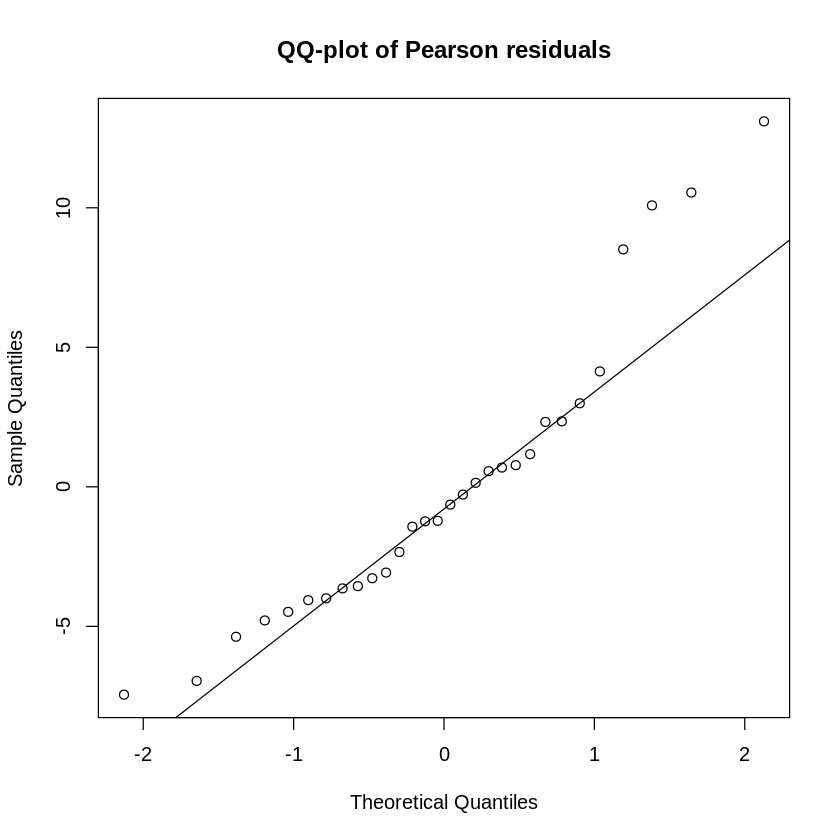

In [4]:
# Normal probability plot of Pearson residuals:

qqnorm(resid(gal1,type="pearson"), main="QQ-plot of Pearson residuals")
qqline(resid(gal1,type="pearson"))

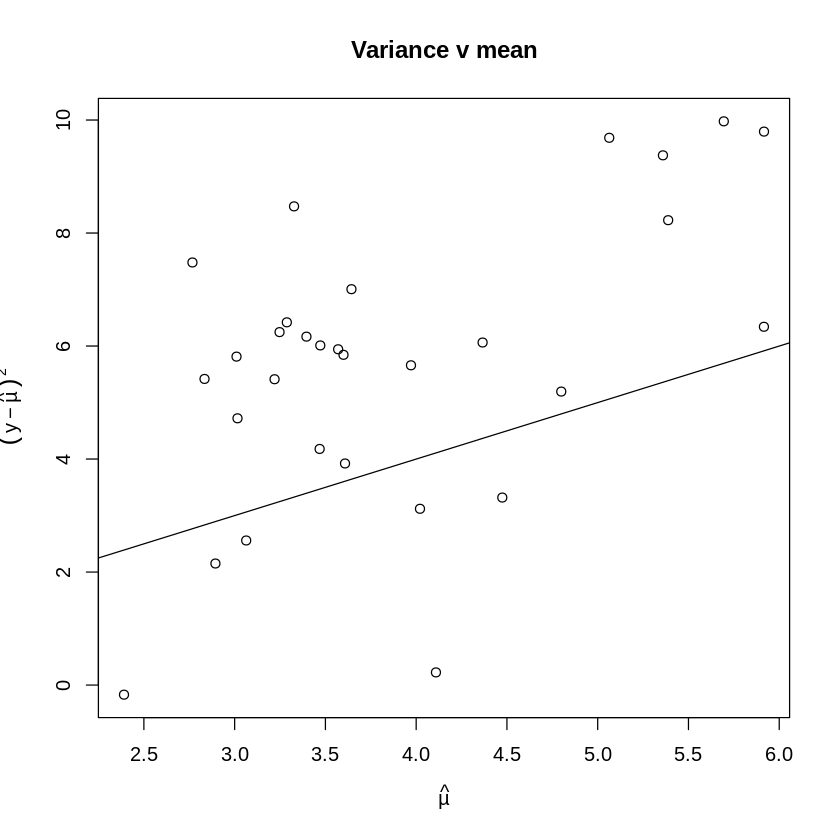

In [5]:
# Plot of variance against mean:

plot(log(fitted(gal1)),log((gala$Species-fitted(gal1))^2), xlab=expression(hat(mu)),ylab=expression((y-hat(mu))^2), main="Variance v mean")
abline(0,1)

In [6]:
# Estimate the dispersion parameter:
X2 <- sum(resid(gal1,type="pearson")^2)
dp <- X2/gal1$df.res
dp

[1] 31.74914

In [7]:
drop1(gal1,test="F")

Warning message in drop1.glm(gal1, test = "F"):
“F test assumes 'quasipoisson' family”


,Df,Deviance,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,716.8458,889.6767,NA,NA
Area,1,1204.3529,1375.1838,16.3217396,4.762092e-04
Elevation,1,2389.5689,2560.3998,56.0027776,1.007228e-07
Nearest,1,739.4108,910.2418,0.7554776,3.933572e-01
Scruz,1,813.6200,984.4509,3.2400008,8.444482e-02
Adjacent,1,1341.4542,1512.2851,20.9118923,1.230182e-04
